<a href="https://colab.research.google.com/github/eunzzae/PJT_C.lab/blob/main/240108_%5B%EA%B8%B0%EC%97%85%EC%97%B0%EA%B3%84PJT%5D_%ED%8C%A8%EC%85%98%EC%B6%94%EC%B2%9C_EDA(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### 항목명    설명  
* E_id : 평가 data ID  
* imgName : 이미지 filename  
* era : 시대별  
* style : 스타일별  
* gender : 이미지 성별  
* R_id : 응답자 ID  
* r_gender : 응답자 성별  
* age : 연령  
* mar : 결혼상태  
* job : 직업  
* income : 월소득액  
* r_style1 : 패션스타일1  
* r_style2 : 패션스타일2  
* r_style3 : 패션스타일3  
* r_style4 : 패션스타일4  
* r_style5 : 패션스타일5  
* Q1 : 스타일 선호도  
* Q2 : 어울리는 계절  
* Q3 : 적합한 착용 상황  
* Q411 : (핏) 평가  
* Q412 : (색깔) 어두움-밝음  
* Q413 : (색감) 차가움-따뜻함  
* Q414 : (분위기) 무거움-가벼움  
* Q4201 : (이미지단어) 멋있다  
* Q4202 : (이미지단어) 도시적이다  
* Q4203 : (이미지단어) 트랜디하다  
* Q4204 : (이미지단어) 세련되다  
* Q4205 : (이미지단어) 깔끔하다  
* Q4206 : (이미지단어) 화려하다  
* Q4207 : (이미지단어) 독특하다
* Q4208 : (이미지단어) 무난하다
* Q4209 : (이미지단어) 개방적이다
* Q4210 : (이미지단어) 실용적이다
* Q4211 : (이미지단어) 활동적이다
* Q4212 : (이미지단어) 편안하다
* Q4213 : (이미지단어) 발랄하다
* Q4214 : (이미지단어) 여성적이다
* Q4215 : (이미지단어) 남성적이다
* Q4216 : (이미지단어) 부드럽다
* Q5 : 스타일 선호도(재질문)

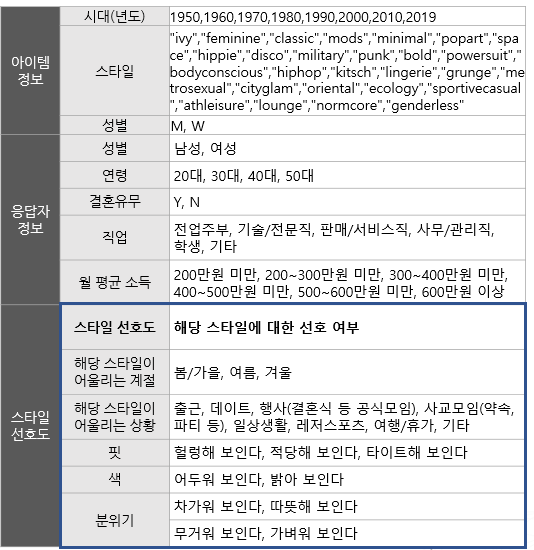

In [ ]:
## 밑에 plot 한글 글씨체 안 깨지게, 나눔글씨체 다운로드 하는 방법
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
# 사용 가능한 폰트 목록 확인
for font in fm.fontManager.ttflist:
    print(font.name)

DejaVu Sans
cmb10
DejaVu Sans
DejaVu Serif
DejaVu Sans Mono
DejaVu Serif
STIXNonUnicode
STIXGeneral
STIXSizeTwoSym
DejaVu Sans Mono
cmtt10
DejaVu Serif
STIXSizeTwoSym
STIXNonUnicode
STIXSizeOneSym
cmmi10
STIXSizeOneSym
DejaVu Sans
STIXNonUnicode
DejaVu Sans
DejaVu Sans Display
STIXGeneral
DejaVu Sans Mono
cmex10
cmsy10
cmss10
DejaVu Serif Display
STIXGeneral
STIXNonUnicode
STIXSizeFourSym
STIXSizeThreeSym
STIXGeneral
cmr10
STIXSizeThreeSym
STIXSizeFourSym
DejaVu Serif
DejaVu Sans Mono
STIXSizeFiveSym
NanumMyeongjo
Liberation Serif
Liberation Sans
Liberation Mono
Humor Sans
NanumBarunGothic
Liberation Mono
Liberation Sans Narrow
Liberation Serif
Liberation Sans
Liberation Sans Narrow
Liberation Sans
Liberation Mono
NanumBarunGothic
NanumGothic
NanumGothicCoding
Liberation Mono
Liberation Sans
NanumSquareRound
NanumSquare
Liberation Sans Narrow
NanumGothicCoding
NanumMyeongjo
NanumSquareRound
Liberation Serif
NanumSquare
Liberation Sans Narrow
Liberation Serif
NanumGothic


In [ ]:
plt.rcParams["font.family"] = 'NanumGothic'

In [ ]:
import os
import pandas as pd
import numpy as np
from math import sqrt
from tqdm import tqdm_notebook as tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import matplotlib as mpl
%matplotlib inline

In [ ]:
def analyze_dataframe(df, item_col_name, user_col_name=None, feedback_col_name=None):
    # 총 데이터 개수
    print(f'총 데이터 raw 수: {len(df)}')

    # item 수가 많은지 user 수가 많은지
    num_items = df[item_col_name].nunique()
    print(f'고유 Item 개수: {num_items}')

    # user_col_name이 제공된 경우에만 고유 user 수를 출력
    if user_col_name:
        num_users = df[user_col_name].nunique()
        print(f'고유 user 수: {num_users}')

    # user feedback 컬럼명을 받으면, 해당 값의 분포와 long tail인지, scaling이 필요한지
    if feedback_col_name:
        feedback_data = df[feedback_col_name]
        plt.figure(figsize=(10, 4))
        sns.histplot(feedback_data, kde=True)
        plt.xlabel(feedback_col_name)
        plt.ylabel('빈도')
        plt.title(f'유저 피드백 변수 {feedback_col_name}의 분포')
        plt.show()

        # Feedback scaling suggestion
        if feedback_data.skew() > 1:
            print(f"해당 {feedback_col_name} 컬럼에 롱테일 분포가 있습니다. 예를 들어 로그 변환을 사용하여 확장하는 것이 좋습니다.")
    else:
        print('유저 피드백 변수는 없습니다.')

    # 정규화가 필요한 컬럼이 있는지(있다면 분포가 어떻게 되는지)
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        if df[col].std()>df[col].mean()*0.3:
          print(f"해당 연속형 변수 '{col}' 컬럼: (표준 편차값: {df[col].std()}, 평균: {df[col].mean()}) [●정규화 유의] std>평균*30% 이상 ")
        else:
          print(f"해당 연속형 변수 '{col}' 컬럼 : (표준 편차값: {df[col].std()}, 평균: {df[col].mean()})")
        # if df[col].std() > 1:
        #     print(f"해당 연속형 변수 '{col}' 컬럼은 표준 편차가 1보다 훨씬 크기 때문에 정규화가 필요할 수 있습니다 (표준 편차값: {df[col].std()})")
        # elif df[col].std() < 0.5:
        #     print(f"해당 연속형 변수 '{col}' 컬럼은 표준 편차가 0.5보다 작기 때문에 정규화가 필요할 수 있습니다 (표준 편차값: {df[col].std()})")

    # 컬럼들 중 범주형 변수와 연속형 변수의 개수와 각각의 비율
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_categorical = len(categorical_columns)
    num_continuous = len(numeric_columns)
    total_columns = num_categorical + num_continuous

    print(f"범주형 변수 개수: {num_categorical} ({num_categorical / total_columns:.2%})")
    print(f"연속형 변수 개수: {num_continuous} ({num_continuous / total_columns:.2%})")
    print(f"총 변수 개수: {total_columns}")

    # 시계열 데이터 컬럼이 있는지 유무
    datetime_columns = df.select_dtypes(include=['datetime', 'datetime64']).columns.tolist()

    # 문자열 형태로 저장된 시계열 데이터를 찾는 부분 추가
    for col in df.select_dtypes(include=['object']).columns:
        try:
            pd.to_datetime(df[col], errors='raise')
            datetime_columns.append(col)
        except:
            pass  # 이 경우, 해당 컬럼은 시계열 데이터가 아님

    if not datetime_columns:
        print('시계열 데이터 없음')
    else:
        print(f'시계열 데이터 컬럼: {datetime_columns}')


    # 컬럼 중에 NaN 값이 있으면 해당 컬럼의 NaN 값 비율을 출력
    for col in df.columns:
        nan_ratio = df[col].isna().sum() / len(df)
        if nan_ratio > 0:
            print(f"'{col}' 컬럼의  NaN 값 비율: {nan_ratio:.2%}")

    # 범주형 변수의 값들과 값들의 비율을 dictionary 형태로 출력
    for col in categorical_columns:
        value_counts = df[col].value_counts(normalize=True, dropna=False)

        # Sorting by value in descending order and limiting to top 30
        sorted_value_counts = sorted(value_counts.items(), key=lambda x: x[1], reverse=True)[:30]
        value_ratios = {value: f"{count * 100:.2f}%" for value, count in sorted_value_counts}
        print(f"범주형 변수 '{col}' 컬럼 값 비율 (상위 30개): {value_ratios}")


      # 롱테일 분포 확인 (user_col_name이 제공된 경우에만 실행)
    if feedback_col_name and user_col_name:
        # 사용자별 평점 횟수 확인
        user_rating_count = df[user_col_name].value_counts()
        plt.figure(figsize=(10, 4))
        user_rating_count.plot(kind='hist', bins=30)
        plt.xlabel('1유저당 매긴 평점 개수')
        plt.ylabel('해당 사용자 수')
        plt.title('1유저당 매긴 평점 개수 분포')
        plt.show()

        # 아이템별 평점 횟수 확인
        item_rating_count = df[item_col_name].value_counts()
        plt.figure(figsize=(10, 4))
        item_rating_count.plot(kind='hist', bins=30)
        plt.xlabel('1아이템당 받은 평점 개수')
        plt.ylabel('해당 아이템 수')
        plt.title('1아이템당 받은 평점 개수 분포')
        plt.show()

# 0. Dataset 불러오기

In [ ]:
# 각자 작업 환경에 맞는 경로를 지정해주세요. Google Colab과 Jupyter환경에서 경로가 다를 수 있습니다.
path = '/content/drive/MyDrive/Colab Notebooks/data/connects_lab'
combined_df = pd.read_csv(os.path.join(path, 'combined_csv.csv'), encoding='utf-8',error_bad_lines=False) #error_bad_lines 무시
result_df = pd.read_csv(os.path.join(path, 'result.csv'), encoding='utf-8',error_bad_lines=False) #error_bad_lines 무시
print(combined_df.shape)
combined_df.head()


<ipython-input-8-13e10f6b3e0c>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  combined_df = pd.read_csv(os.path.join(path, 'combined_csv.csv'), encoding='utf-8',error_bad_lines=False) #error_bad_lines 무시
<ipython-input-8-13e10f6b3e0c>:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  result_df = pd.read_csv(os.path.join(path, 'result.csv'), encoding='utf-8',error_bad_lines=False) #error_bad_lines 무시


(30650, 4)


,E_id,imgName,item,user
0,201566,T_00003_19_normcore_M.jpg,"{'imgName': 'T_00003_19_normcore_M.jpg', 'era'...","{'R_id': 66640, 'r_gender': 1, 'age': 4, 'mar'..."
1,202479,T_00007_19_normcore_M.jpg,"{'imgName': 'T_00007_19_normcore_M.jpg', 'era'...","{'R_id': 66684, 'r_gender': 1, 'age': 1, 'mar'..."
2,34965,T_00008_19_normcore_M.jpg,"{'imgName': 'T_00008_19_normcore_M.jpg', 'era'...","{'R_id': 23139, 'r_gender': 1, 'age': 3, 'mar'..."
3,207625,T_00010_19_normcore_M.jpg,"{'imgName': 'T_00010_19_normcore_M.jpg', 'era'...","{'R_id': 66843, 'r_gender': 1, 'age': 1, 'mar'..."
4,72350,T_00011_19_normcore_M.jpg,"{'imgName': 'T_00011_19_normcore_M.jpg', 'era'...","{'R_id': 52485, 'r_gender': 1, 'age': 3, 'mar'..."


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30650 entries, 0 to 30649
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   E_id     30650 non-null  int64 
 1   imgName  30650 non-null  object
 2   item     30650 non-null  object
 3   user     30650 non-null  object
dtypes: int64(1), object(3)
memory usage: 957.9+ KB


In [ ]:
import pandas as pd
import ast  # 문자열을 딕셔너리로 변환하기 위한 라이브러리

# 'item'과 'user' 열의 딕셔너리 값을 문자열에서 실제 딕셔너리로 변환
combined_df['item'] = combined_df['item'].apply(ast.literal_eval)
combined_df['user'] = combined_df['user'].apply(ast.literal_eval)

# 'item'과 'user' 열의 딕셔너리 key 값을 피처로 구성하여 DataFrame 생성
item_keys = combined_df['item'].apply(lambda x: list(x.keys())).explode().unique()
user_keys = combined_df['user'].apply(lambda x: list(x.keys())).explode().unique()

all_keys = set(list(item_keys) + list(user_keys))  # item과 user의 모든 key 값을 피처로 가져옴

# 각 딕셔너리에서 key 값을 찾아 해당 key가 있으면 값을 가져오고, 없으면 NaN으로 처리
for key in all_keys:
    combined_df[key] = combined_df['item'].apply(lambda x: x.get(key))
    combined_df[key].fillna(combined_df['user'].apply(lambda x: x.get(key)), inplace=True)

# 필요없는 'item'과 'user' 열 제거
combined_df.drop(['item', 'user'], axis=1, inplace=True)

print(combined_df)


         E_id                      imgName   era  age  r_style5  r_style2  \
0      201566    T_00003_19_normcore_M.jpg  2019    4         2         2   
1      202479    T_00007_19_normcore_M.jpg  2019    1         2         1   
2       34965    T_00008_19_normcore_M.jpg  2019    3         2         1   
3      207625    T_00010_19_normcore_M.jpg  2019    1         2         1   
4       72350    T_00011_19_normcore_M.jpg  2019    3         2         1   
...       ...                          ...   ...  ...       ...       ...   
30645  237899  W_96426_19_genderless_W.jpg  2019    2         2         1   
30646  237907      W_96472_19_lounge_W.jpg  2019    2         2         1   
30647  237915      W_96487_19_lounge_W.jpg  2019    2         2         1   
30648  237916      W_96507_19_lounge_W.jpg  2019    2         2         1   
30649   60431    W_96574_19_normcore_W.jpg  2019    1         1         2   

      gender  r_gender       style  \
0          M         1    normcore   

In [ ]:
user_df = combined_df[['R_id','E_id','imgName','r_gender','age','mar','job','income','r_style1','r_style2','r_style3','r_style4','r_style5']]
user_df.head()

,R_id,E_id,imgName,r_gender,age,mar,job,income,r_style1,r_style2,r_style3,r_style4,r_style5
0,66640,201566,T_00003_19_normcore_M.jpg,1,4,2,4,3,2,2,2,2,2
1,66684,202479,T_00007_19_normcore_M.jpg,1,1,1,5,1,2,1,2,2,2
2,23139,34965,T_00008_19_normcore_M.jpg,1,3,1,4,3,2,1,1,2,2
3,66843,207625,T_00010_19_normcore_M.jpg,1,1,1,2,3,2,1,2,1,2
4,52485,72350,T_00011_19_normcore_M.jpg,1,3,2,4,4,2,1,1,1,2


In [ ]:
item_df = combined_df[['R_id','E_id', 'imgName', 'era', 'style', 'gender']]
item_df.head()

,R_id,E_id,imgName,era,style,gender
0,66640,201566,T_00003_19_normcore_M.jpg,2019,normcore,M
1,66684,202479,T_00007_19_normcore_M.jpg,2019,normcore,M
2,23139,34965,T_00008_19_normcore_M.jpg,2019,normcore,M
3,66843,207625,T_00010_19_normcore_M.jpg,2019,normcore,M
4,52485,72350,T_00011_19_normcore_M.jpg,2019,normcore,M


In [ ]:
survey_df = combined_df[['R_id','E_id','imgName','survey']]
survey_df

,R_id,E_id,imgName,survey
0,66640,201566,T_00003_19_normcore_M.jpg,"{'Q1': 3, 'Q2': 1, 'Q3': 2, 'Q411': 1, 'Q412':..."
1,66684,202479,T_00007_19_normcore_M.jpg,"{'Q1': 2, 'Q2': 1, 'Q3': 5, 'Q411': 1, 'Q412':..."
2,23139,34965,T_00008_19_normcore_M.jpg,"{'Q1': 3, 'Q2': 3, 'Q3': 5, 'Q411': 2, 'Q412':..."
3,66843,207625,T_00010_19_normcore_M.jpg,"{'Q1': 3, 'Q2': 1, 'Q3': 2, 'Q411': 2, 'Q412':..."
4,52485,72350,T_00011_19_normcore_M.jpg,"{'Q1': 3, 'Q2': 1, 'Q3': 5, 'Q411': 2, 'Q412':..."
...,...,...,...,...
30645,68483,237899,W_96426_19_genderless_W.jpg,"{'Q1': 2, 'Q2': 3, 'Q3': 1, 'Q411': 1, 'Q412':..."
30646,68483,237907,W_96472_19_lounge_W.jpg,"{'Q1': 2, 'Q2': 1, 'Q3': 2, 'Q411': 2, 'Q412':..."
30647,68483,237915,W_96487_19_lounge_W.jpg,"{'Q1': 1, 'Q2': 1, 'Q3': 3, 'Q411': 1, 'Q412':..."
30648,68483,237916,W_96507_19_lounge_W.jpg,"{'Q1': 3, 'Q2': 2, 'Q3': 2, 'Q411': 3, 'Q412':..."


# 1. EDA


## 1-1) 데이터 전처리

### user_df

In [ ]:
# 특정 행의 인덱스를 지정하여 해당 행의 'survey' 열 데이터 확인
index = 0  # 확인하고자 하는 특정 행의 인덱스
specific_data = survey_df['survey'][index]

# 'survey' 열의 딕셔너리 key 값을 피처로 구성하여 DataFrame 생성
survey_keys = survey_df['survey'].apply(lambda x: list(x.keys())).explode().unique()

all_keys = set(list(survey_keys))  # 모든 key 값을 피처로 가져옴

# 각 딕셔너리에서 key 값을 찾아 해당 key가 있으면 값을 가져오고, 없으면 NaN으로 처리
for key in all_keys:
    survey_df[key] = survey_df['survey'].apply(lambda x: x.get(key))
    survey_df[key].fillna(survey_df['survey'].apply(lambda x: x.get(key)), inplace=True)

# 필요없는 'survey' 열 제거
survey_df.drop(['survey'], axis=1, inplace=True)

print(survey_df)


<ipython-input-14-40cab57eeac8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df[key] = survey_df['survey'].apply(lambda x: x.get(key))
<ipython-input-14-40cab57eeac8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df[key].fillna(survey_df['survey'].apply(lambda x: x.get(key)), inplace=True)
<ipython-input-14-40cab57eeac8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

        R_id    E_id                      imgName  Q1  Q3  Q4215  Q4216  \
0      66640  201566    T_00003_19_normcore_M.jpg   3   2      0      0   
1      66684  202479    T_00007_19_normcore_M.jpg   2   5      0      0   
2      23139   34965    T_00008_19_normcore_M.jpg   3   5      0      0   
3      66843  207625    T_00010_19_normcore_M.jpg   3   2     15     16   
4      52485   72350    T_00011_19_normcore_M.jpg   3   5      0      0   
...      ...     ...                          ...  ..  ..    ...    ...   
30645  68483  237899  W_96426_19_genderless_W.jpg   2   1      0      0   
30646  68483  237907      W_96472_19_lounge_W.jpg   2   2      0      0   
30647  68483  237915      W_96487_19_lounge_W.jpg   1   3     15      0   
30648  68483  237916      W_96507_19_lounge_W.jpg   3   2      0      0   
30649  35530   60431    W_96574_19_normcore_W.jpg   2   5      0     16   

       Q4210  Q411  Q2  ...  Q4204  Q4208  Q4209  Q412  Q4203  Q4213  Q413  \
0         10     1   

In [ ]:
columns_to_convert = ['r_gender','age','mar','job','income']
user_df[columns_to_convert] = user_df[columns_to_convert].astype('int')

<ipython-input-15-394c336126dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df[columns_to_convert] = user_df[columns_to_convert].astype('int')


In [ ]:
# 매핑 딕셔너리 정의
gender_mapping = {1: '남자', 2: '여자'}
age_mapping = {1: '20대', 2: '30대', 3: '40대', 4: '50대'}
mar_mapping = {1: '기혼', 2: '미혼'}
job_mapping = {1: '전업주부', 2: '기술/전문직', 3: '판매/서비스직', 4: '사무/관리직', 5: '학생', 6: '기타'}
income_mapping = {1: '200만원 미만', 2: '200-300만원 미만', 3: '300-400만원 미만', 4: '400-500만원 미만', 5: '500-600만원 미만', 6: '600만원 이상'}
r_style1_mapping = {1: '화려/독특', 2:'무난/평범'}
r_style2_mapping = {1: '남성적/여성적', 2:'중성적'}
r_style3_mapping = {1:'전통적', 2:'트랜디'}
r_style4_mapping = {1:'포멀',2:'캐주얼'}
r_style5_mapping = {1:'활발함', 2:'점잖음'}

# 딕셔너리 매핑 적용
user_df['r_gender'] = user_df['r_gender'].map(gender_mapping)
user_df['age'] = user_df['age'].map(age_mapping)
user_df['mar'] = user_df['mar'].map(mar_mapping)
user_df['job'] = user_df['job'].map(job_mapping)
user_df['income'] = user_df['income'].map(income_mapping)
user_df['r_style1'] = user_df['r_style1'].map(r_style1_mapping)
user_df['r_style2'] = user_df['r_style2'].map(r_style2_mapping)
user_df['r_style3'] = user_df['r_style3'].map(r_style3_mapping)
user_df['r_style4'] = user_df['r_style4'].map(r_style4_mapping)
user_df['r_style5'] = user_df['r_style5'].map(r_style5_mapping)

# 변경된 데이터프레임 확인
print(user_df)

        R_id    E_id                      imgName r_gender  age mar     job  \
0      66640  201566    T_00003_19_normcore_M.jpg       남자  50대  미혼  사무/관리직   
1      66684  202479    T_00007_19_normcore_M.jpg       남자  20대  기혼      학생   
2      23139   34965    T_00008_19_normcore_M.jpg       남자  40대  기혼  사무/관리직   
3      66843  207625    T_00010_19_normcore_M.jpg       남자  20대  기혼  기술/전문직   
4      52485   72350    T_00011_19_normcore_M.jpg       남자  40대  미혼  사무/관리직   
...      ...     ...                          ...      ...  ...  ..     ...   
30645  68483  237899  W_96426_19_genderless_W.jpg       여자  30대  미혼    전업주부   
30646  68483  237907      W_96472_19_lounge_W.jpg       여자  30대  미혼    전업주부   
30647  68483  237915      W_96487_19_lounge_W.jpg       여자  30대  미혼    전업주부   
30648  68483  237916      W_96507_19_lounge_W.jpg       여자  30대  미혼    전업주부   
30649  35530   60431    W_96574_19_normcore_W.jpg       여자  20대  기혼      기타   

             income r_style1 r_style2 r_style3 r_st

<ipython-input-16-04e4dce414ee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['r_gender'] = user_df['r_gender'].map(gender_mapping)
<ipython-input-16-04e4dce414ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['age'] = user_df['age'].map(age_mapping)
<ipython-input-16-04e4dce414ee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
user_df.head()

,R_id,E_id,imgName,r_gender,age,mar,job,income,r_style1,r_style2,r_style3,r_style4,r_style5
0,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,트랜디,캐주얼,점잖음
1,66684,202479,T_00007_19_normcore_M.jpg,남자,20대,기혼,학생,200만원 미만,무난/평범,남성적/여성적,트랜디,캐주얼,점잖음
2,23139,34965,T_00008_19_normcore_M.jpg,남자,40대,기혼,사무/관리직,300-400만원 미만,무난/평범,남성적/여성적,전통적,캐주얼,점잖음
3,66843,207625,T_00010_19_normcore_M.jpg,남자,20대,기혼,기술/전문직,300-400만원 미만,무난/평범,남성적/여성적,트랜디,포멀,점잖음
4,52485,72350,T_00011_19_normcore_M.jpg,남자,40대,미혼,사무/관리직,400-500만원 미만,무난/평범,남성적/여성적,전통적,포멀,점잖음


#### user_df 데이터 둘러보기

In [ ]:
## 데이터 둘러보기
analyze_dataframe(user_df, item_col_name='imgName')

총 데이터 raw 수: 30650
고유 Item 개수: 24187
유저 피드백 변수는 없습니다.
해당 연속형 변수 'R_id' 컬럼: (표준 편차값: 19664.52652305505, 평균: 52578.74841761827) [●정규화 유의] std>평균*30% 이상 
해당 연속형 변수 'E_id' 컬럼: (표준 편차값: 70321.47922074985, 평균: 123215.3985644372) [●정규화 유의] std>평균*30% 이상 
범주형 변수 개수: 11 (84.62%)
연속형 변수 개수: 2 (15.38%)
총 변수 개수: 13
시계열 데이터 없음
범주형 변수 'imgName' 컬럼 값 비율 (상위 30개): {'T_19160_19_normcore_M.jpg': '0.02%', 'T_19174_19_normcore_M.jpg': '0.02%', 'T_19170_19_normcore_M.jpg': '0.02%', 'T_19164_19_normcore_M.jpg': '0.02%', 'T_17691_19_normcore_M.jpg': '0.02%', 'W_81534_19_normcore_M.jpg': '0.02%', 'T_17888_19_normcore_M.jpg': '0.01%', 'W_81525_19_normcore_M.jpg': '0.01%', 'W_81529_19_normcore_M.jpg': '0.01%', 'W_81520_19_normcore_M.jpg': '0.01%', 'T_19173_19_normcore_M.jpg': '0.01%', 'W_20034_19_normcore_M.jpg': '0.01%', 'W_46240_19_normcore_W.jpg': '0.01%', 'W_46154_19_genderless_W.jpg': '0.01%', 'W_23216_19_normcore_M.jpg': '0.01%', 'W_46166_19_lounge_W.jpg': '0.01%', 'W_46170_19_normcore_W.jpg': '0.01%', 'W

### survey_df

In [ ]:
survey_df=survey_df[['R_id','E_id', 'imgName','Q1', 'Q2', 'Q3', 'Q411', 'Q412','Q413', 'Q414','Q4201','Q4202', 'Q4203', 'Q4204','Q4205', 'Q4206','Q4207', 'Q4208', 'Q4209', 'Q4210','Q4211', 'Q4212','Q4213', 'Q4214','Q4215', 'Q4216','Q5']]

In [ ]:
# 현재 피처 이름 출력
print('변경 전 피처 이름:', survey_df.columns.tolist())

# 피처 이름 변경할 매핑 딕셔너리 생성
new_names = {
    'R_id' : 'R_id',
    'E_id' : 'E_id',
    'imgName' : 'imgName',
    'Q1' : '선호여부',
    'Q2' : '어울리는 계절',
    'Q3' : '적합한 상황',
    'Q411' : '핏(평가)',
    'Q412' : '색깔',
    'Q413' : '색감',
    'Q414' : '분위기',
    'Q4201' : '멋있음',
    'Q4202' : '도시적임',
    'Q4203' : '트랜디함',
    'Q4204' : '세련됨',
    'Q4205' : '깔끔함',
    'Q4206' : '화려함',
    'Q4207' : '독특함',
    'Q4208' : '무난함',
    'Q4209' : '개방적임',
    'Q4210' : '실용적임',
    'Q4211' : '활동적임',
    'Q4212' : '편안함',
    'Q4213' : '발랄함',
    'Q4214' : '여성적임',
    'Q4215' : '남성적임',
    'Q4216' : '부드러움',
    'Q5' : '선호도(재질문)'
}

# 피처 이름 변경
survey_df.rename(columns=new_names, inplace=True)

# 변경된 피처 이름 출력
print('변경 후 피처 이름:', survey_df.columns.tolist())

변경 전 피처 이름: ['R_id', 'E_id', 'imgName', 'Q1', 'Q2', 'Q3', 'Q411', 'Q412', 'Q413', 'Q414', 'Q4201', 'Q4202', 'Q4203', 'Q4204', 'Q4205', 'Q4206', 'Q4207', 'Q4208', 'Q4209', 'Q4210', 'Q4211', 'Q4212', 'Q4213', 'Q4214', 'Q4215', 'Q4216', 'Q5']
변경 후 피처 이름: ['R_id', 'E_id', 'imgName', '선호여부', '어울리는 계절', '적합한 상황', '핏(평가)', '색깔', '색감', '분위기', '멋있음', '도시적임', '트랜디함', '세련됨', '깔끔함', '화려함', '독특함', '무난함', '개방적임', '실용적임', '활동적임', '편안함', '발랄함', '여성적임', '남성적임', '부드러움', '선호도(재질문)']


In [ ]:
survey_df

,R_id,E_id,imgName,선호여부,어울리는 계절,적합한 상황,핏(평가),색깔,색감,분위기,...,무난함,개방적임,실용적임,활동적임,편안함,발랄함,여성적임,남성적임,부드러움,선호도(재질문)
0,66640,201566,T_00003_19_normcore_M.jpg,3,1,2,1,2,2,2,...,8,0,10,11,12,13,0,0,0,2
1,66684,202479,T_00007_19_normcore_M.jpg,2,1,5,1,1,2,2,...,8,0,10,11,12,0,0,0,0,1
2,23139,34965,T_00008_19_normcore_M.jpg,3,3,5,2,1,2,1,...,8,0,0,0,12,0,0,0,0,2
3,66843,207625,T_00010_19_normcore_M.jpg,3,1,2,2,2,2,2,...,8,0,10,11,12,0,0,15,16,2
4,52485,72350,T_00011_19_normcore_M.jpg,3,1,5,2,2,1,2,...,0,0,10,0,12,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30645,68483,237899,W_96426_19_genderless_W.jpg,2,3,1,1,1,2,1,...,8,0,10,0,0,0,0,0,0,1
30646,68483,237907,W_96472_19_lounge_W.jpg,2,1,2,2,2,2,2,...,0,0,0,0,0,13,14,0,0,1
30647,68483,237915,W_96487_19_lounge_W.jpg,1,1,3,1,2,1,1,...,0,0,0,0,0,0,0,15,0,1
30648,68483,237916,W_96507_19_lounge_W.jpg,3,2,2,3,2,1,1,...,0,0,0,0,0,0,14,0,0,2


In [ ]:
# 매핑 딕셔너리 정의
prefer1_mapping = {1: '그렇지 않다', 2: '그렇지 않다', 3:'그렇다', 4:'그렇다'}
season_mapping = {1: '봄/가을', 2: '여름', 3: '겨울'}
situation_mapping = {1: '출근', 2: '데이트', 3: '공식모임(결혼식)', 4: '사교모임(파티)', 5: '일상생활', 6: '레저스포츠', 7: '여행/휴가', 6: '기타'}
fit_mapping = {1: '헐렁해 보임', 2: '적당해 보임', 3: '타이트해 보임'}
color1_mapping = {1: '어두워 보임', 2: '밝아 보임'}
color2_mapping = {1: '차가워 보임', 2:'따뜻해 보임'}
mood_mapping = {1: '무거워 보임', 2:'가벼워 보임'}
image1_mapping = {0:'멋있지 않음', 1:'멋있음'}
image2_mapping = {0:'도시적이지 않음',2:'도시적임'}
image3_mapping = {0:'트랜디하지 않음', 3:'트랜디함'}
image4_mapping = {0:'세련되지 않음', 4:'세련됨'}
image5_mapping = {0:'깔끔하지 않음', 5:'깔끔함'}
image6_mapping = {0:'화려하지 않음', 6:'화려함'}
image7_mapping = {0:'독특하지 않음', 7:'독특함'}
image8_mapping = {0:'무난하지 않음', 8:'무난함'}
image9_mapping = {0:'개방적이지 않음', 9:'개방적임'}
image10_mapping = {0:'실용적이지 않음', 10:'실용적임'}
image11_mapping = {0:'활동적이지 않음', 11:'활동적임'}
image12_mapping = {0:'편안하지 않음', 12:'편안함'}
image13_mapping = {0:'발랄하지 않음', 13:'발랄함'}
image14_mapping = {0:'여성적이지 않음', 14:'여성적임'}
image15_mapping = {0:'남성적이지 않음', 15:'남성적임'}
image16_mapping = {0:'부드럽지 않음', 16:'부드러움'}
prefer2_mapping = {1:'그렇지 않다', 2:'그렇다'}

# 딕셔너리 매핑 적용
survey_df['선호여부'] = survey_df['선호여부'].map(prefer1_mapping)
survey_df['어울리는 계절'] = survey_df['어울리는 계절'].map(season_mapping)
survey_df['적합한 상황'] = survey_df['적합한 상황'].map(situation_mapping)
survey_df['핏(평가)'] = survey_df['핏(평가)'].map(fit_mapping)
survey_df['색깔'] = survey_df['색깔'].map(color1_mapping)
survey_df['색감'] = survey_df['색감'].map(color2_mapping)
survey_df['분위기'] = survey_df['분위기'].map(mood_mapping)
survey_df['멋있음'] = survey_df['멋있음'].map(image1_mapping)
survey_df['도시적임'] = survey_df['도시적임'].map(image2_mapping)
survey_df['트랜디함'] = survey_df['트랜디함'].map(image3_mapping)
survey_df['세련됨'] = survey_df['세련됨'].map(image4_mapping)
survey_df['깔끔함'] = survey_df['깔끔함'].map(image5_mapping)
survey_df['화려함'] = survey_df['화려함'].map(image6_mapping)
survey_df['독특함'] = survey_df['독특함'].map(image7_mapping)
survey_df['무난함'] = survey_df['무난함'].map(image8_mapping)
survey_df['개방적임'] = survey_df['개방적임'].map(image9_mapping)
survey_df['실용적임'] = survey_df['실용적임'].map(image10_mapping)
survey_df['활동적임'] = survey_df['활동적임'].map(image11_mapping)
survey_df['편안함'] = survey_df['편안함'].map(image12_mapping)
survey_df['발랄함'] = survey_df['발랄함'].map(image13_mapping)
survey_df['여성적임'] = survey_df['여성적임'].map(image14_mapping)
survey_df['남성적임'] = survey_df['남성적임'].map(image15_mapping)
survey_df['부드러움'] = survey_df['부드러움'].map(image16_mapping)
survey_df['선호도(재질문)'] = survey_df['선호도(재질문)'].map(prefer2_mapping)

# 변경된 데이터프레임 확인
print(survey_df)

        R_id    E_id                      imgName    선호여부 어울리는 계절     적합한 상황  \
0      66640  201566    T_00003_19_normcore_M.jpg     그렇다    봄/가을        데이트   
1      66684  202479    T_00007_19_normcore_M.jpg  그렇지 않다    봄/가을       일상생활   
2      23139   34965    T_00008_19_normcore_M.jpg     그렇다      겨울       일상생활   
3      66843  207625    T_00010_19_normcore_M.jpg     그렇다    봄/가을        데이트   
4      52485   72350    T_00011_19_normcore_M.jpg     그렇다    봄/가을       일상생활   
...      ...     ...                          ...     ...     ...        ...   
30645  68483  237899  W_96426_19_genderless_W.jpg  그렇지 않다      겨울         출근   
30646  68483  237907      W_96472_19_lounge_W.jpg  그렇지 않다    봄/가을        데이트   
30647  68483  237915      W_96487_19_lounge_W.jpg  그렇지 않다    봄/가을  공식모임(결혼식)   
30648  68483  237916      W_96507_19_lounge_W.jpg     그렇다      여름        데이트   
30649  35530   60431    W_96574_19_normcore_W.jpg  그렇지 않다    봄/가을       일상생활   

         핏(평가)      색깔      색감     분위기 

#### survey_df 데이터 둘러보기

In [ ]:
## 데이터 둘러보기
analyze_dataframe(survey_df, item_col_name='imgName')

총 데이터 raw 수: 30650
고유 Item 개수: 24187
유저 피드백 변수는 없습니다.
해당 연속형 변수 'R_id' 컬럼: (표준 편차값: 19664.52652305505, 평균: 52578.74841761827) [●정규화 유의] std>평균*30% 이상 
해당 연속형 변수 'E_id' 컬럼: (표준 편차값: 70321.47922074985, 평균: 123215.3985644372) [●정규화 유의] std>평균*30% 이상 
범주형 변수 개수: 25 (92.59%)
연속형 변수 개수: 2 (7.41%)
총 변수 개수: 27
시계열 데이터 없음
'적합한 상황' 컬럼의  NaN 값 비율: 4.70%
범주형 변수 'imgName' 컬럼 값 비율 (상위 30개): {'T_19160_19_normcore_M.jpg': '0.02%', 'T_19174_19_normcore_M.jpg': '0.02%', 'T_19170_19_normcore_M.jpg': '0.02%', 'T_19164_19_normcore_M.jpg': '0.02%', 'T_17691_19_normcore_M.jpg': '0.02%', 'W_81534_19_normcore_M.jpg': '0.02%', 'T_17888_19_normcore_M.jpg': '0.01%', 'W_81525_19_normcore_M.jpg': '0.01%', 'W_81529_19_normcore_M.jpg': '0.01%', 'W_81520_19_normcore_M.jpg': '0.01%', 'T_19173_19_normcore_M.jpg': '0.01%', 'W_20034_19_normcore_M.jpg': '0.01%', 'W_46240_19_normcore_W.jpg': '0.01%', 'W_46154_19_genderless_W.jpg': '0.01%', 'W_23216_19_normcore_M.jpg': '0.01%', 'W_46166_19_lounge_W.jpg': '0.01%', 'W_46170_19

### 사전정보 확인
- 1.총 데이터 수,고유 item수, 고유 user수 체크
- 2.범주형,연속형,시계열변수 체크
- 3.변수별 결측값 비율 체크
- 4.각 범주형 변수별 카테고리 비율 체크
- 5.유저 피드백변수 유무
- 6.유저 피드백 변수의 sparse or density (롱테일,콜드스타터체크) 체크

## 1-2) 피처 엔지니어링


#### total_survey

In [ ]:
total_survey = survey_df.copy()

In [ ]:
# 특정 컬럼만 선택하여 결합하여 새로운 컬럼 생성
selected_columns = ['선호여부',
 '어울리는 계절',
 '적합한 상황',
 '핏(평가)',
 '색깔',
 '색감',
 '분위기',
 '멋있음',
 '도시적임',
 '트랜디함',
 '세련됨',
 '깔끔함',
 '화려함',
 '독특함',
 '무난함',
 '개방적임',
 '실용적임',
 '활동적임',
 '편안함',
 '발랄함',
 '여성적임',
 '남성적임',
 '부드러움',
 '선호도(재질문)']  # 선택할 컬럼들

total_survey['응답내용'] = total_survey[selected_columns].apply(lambda row: '_'.join(map(str, row)), axis=1)

# 결과 확인
print(total_survey)

        R_id    E_id                      imgName    선호여부 어울리는 계절     적합한 상황  \
0      66640  201566    T_00003_19_normcore_M.jpg     그렇다    봄/가을        데이트   
1      66684  202479    T_00007_19_normcore_M.jpg  그렇지 않다    봄/가을       일상생활   
2      23139   34965    T_00008_19_normcore_M.jpg     그렇다      겨울       일상생활   
3      66843  207625    T_00010_19_normcore_M.jpg     그렇다    봄/가을        데이트   
4      52485   72350    T_00011_19_normcore_M.jpg     그렇다    봄/가을       일상생활   
...      ...     ...                          ...     ...     ...        ...   
30645  68483  237899  W_96426_19_genderless_W.jpg  그렇지 않다      겨울         출근   
30646  68483  237907      W_96472_19_lounge_W.jpg  그렇지 않다    봄/가을        데이트   
30647  68483  237915      W_96487_19_lounge_W.jpg  그렇지 않다    봄/가을  공식모임(결혼식)   
30648  68483  237916      W_96507_19_lounge_W.jpg     그렇다      여름        데이트   
30649  35530   60431    W_96574_19_normcore_W.jpg  그렇지 않다    봄/가을       일상생활   

         핏(평가)      색깔      색감     분위기 

In [ ]:
total_survey.head()

,R_id,E_id,imgName,선호여부,어울리는 계절,적합한 상황,핏(평가),색깔,색감,분위기,...,개방적임,실용적임,활동적임,편안함,발랄함,여성적임,남성적임,부드러움,선호도(재질문),응답내용
0,66640,201566,T_00003_19_normcore_M.jpg,그렇다,봄/가을,데이트,헐렁해 보임,밝아 보임,따뜻해 보임,가벼워 보임,...,개방적이지 않음,실용적임,활동적임,편안함,발랄함,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_봄/가을_데이트_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음...
1,66684,202479,T_00007_19_normcore_M.jpg,그렇지 않다,봄/가을,일상생활,헐렁해 보임,어두워 보임,따뜻해 보임,가벼워 보임,...,개방적이지 않음,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_일상생활_헐렁해 보임_어두워 보임_따뜻해 보임_가벼워 보임_멋...
2,23139,34965,T_00008_19_normcore_M.jpg,그렇다,겨울,일상생활,적당해 보임,어두워 보임,따뜻해 보임,무거워 보임,...,개방적이지 않음,실용적이지 않음,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_겨울_일상생활_적당해 보임_어두워 보임_따뜻해 보임_무거워 보임_멋있지 않음...
3,66843,207625,T_00010_19_normcore_M.jpg,그렇다,봄/가을,데이트,적당해 보임,밝아 보임,따뜻해 보임,가벼워 보임,...,개방적이지 않음,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적임,부드러움,그렇다,그렇다_봄/가을_데이트_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있음_도시...
4,52485,72350,T_00011_19_normcore_M.jpg,그렇다,봄/가을,일상생활,적당해 보임,밝아 보임,차가워 보임,가벼워 보임,...,개방적이지 않음,실용적임,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_봄/가을_일상생활_적당해 보임_밝아 보임_차가워 보임_가벼워 보임_멋있지 않...


In [ ]:
# 새로운 컬럼 생성 (선호여부와 선호도(재질문)의 일치 여부에 따라)
total_survey['선호도_일치여부'] = total_survey.apply(lambda row: '일치' if row['선호여부'] == row['선호도(재질문)'] else '불일치', axis=1)


In [ ]:
# # 필요없는 컬럼 드랍
# total_survey = total_survey.drop(['선호여부','어울리는 계절','적합한 상황','핏(평가)','색깔','색감','분위기','멋있음','도시적임','트랜디함','세련됨','깔끔함','화려함','독특함','무난함','개방적임','실용적임','활동적임','편안함','발랄함','여성적임','남성적임','부드러움','선호도(재질문)'],axis=1)

In [ ]:
total_survey[total_survey['선호도_일치여부']=='불일치']

,R_id,E_id,imgName,선호여부,어울리는 계절,적합한 상황,핏(평가),색깔,색감,분위기,...,실용적임,활동적임,편안함,발랄함,여성적임,남성적임,부드러움,선호도(재질문),응답내용,선호도_일치여부
28,67307,217714,T_00065_19_normcore_M.jpg,그렇지 않다,봄/가을,일상생활,적당해 보임,밝아 보임,따뜻해 보임,가벼워 보임,...,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇지 않다_봄/가을_일상생활_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있...,불일치
30,10280,14468,T_00075_19_normcore_M.jpg,그렇지 않다,여름,여행/휴가,헐렁해 보임,밝아 보임,차가워 보임,가벼워 보임,...,실용적임,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇지 않다_여름_여행/휴가_헐렁해 보임_밝아 보임_차가워 보임_가벼워 보임_멋있지...,불일치
31,67015,211807,T_00077_19_normcore_M.jpg,그렇다,여름,기타,헐렁해 보임,어두워 보임,차가워 보임,가벼워 보임,...,실용적이지 않음,활동적임,편안하지 않음,발랄함,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇다_여름_기타_헐렁해 보임_어두워 보임_차가워 보임_가벼워 보임_멋있음_도시적이...,불일치
34,67117,214547,T_00084_19_normcore_M.jpg,그렇다,봄/가을,데이트,적당해 보임,어두워 보임,따뜻해 보임,가벼워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇다_봄/가을_데이트_적당해 보임_어두워 보임_따뜻해 보임_가벼워 보임_멋있음_도...,불일치
46,52002,71541,T_00108_19_normcore_M.jpg,그렇지 않다,봄/가을,데이트,적당해 보임,밝아 보임,따뜻해 보임,무거워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇지 않다_봄/가을_데이트_적당해 보임_밝아 보임_따뜻해 보임_무거워 보임_멋있음...,불일치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30496,2594,6689,W_93211_19_normcore_W.jpg,그렇지 않다,겨울,데이트,헐렁해 보임,밝아 보임,따뜻해 보임,무거워 보임,...,실용적이지 않음,활동적이지 않음,편안함,발랄함,여성적임,남성적이지 않음,부드러움,그렇다,그렇지 않다_겨울_데이트_헐렁해 보임_밝아 보임_따뜻해 보임_무거워 보임_멋있지 않...,불일치
30499,2594,6690,W_93372_19_normcore_W.jpg,그렇지 않다,겨울,데이트,적당해 보임,밝아 보임,따뜻해 보임,무거워 보임,...,실용적이지 않음,활동적임,편안하지 않음,발랄함,여성적임,남성적이지 않음,부드럽지 않음,그렇다,그렇지 않다_겨울_데이트_적당해 보임_밝아 보임_따뜻해 보임_무거워 보임_멋있지 않...,불일치
30597,49726,67982,W_95796_19_normcore_W.jpg,그렇다,봄/가을,공식모임(결혼식),적당해 보임,밝아 보임,따뜻해 보임,무거워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적임,남성적이지 않음,부드러움,그렇지 않다,그렇다_봄/가을_공식모임(결혼식)_적당해 보임_밝아 보임_따뜻해 보임_무거워 보임_...,불일치
30632,68483,237910,W_96174_19_normcore_W.jpg,그렇다,봄/가을,데이트,헐렁해 보임,밝아 보임,차가워 보임,무거워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇다_봄/가을_데이트_헐렁해 보임_밝아 보임_차가워 보임_무거워 보임_멋있음_도시...,불일치


## 1-3) 피처요약표

In [ ]:
def resumetable(df):
  print(f'데이터 세트 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['임의값'] = df.loc[0].values

  # 고윳값 한번에 출력하기
  unique_feature = []
  for i in range(len(df.columns)):
    feature = df.columns[i]
    unique_feature.append(df[feature].unique())
  summary['고윳값'] = unique_feature

  return summary

In [ ]:
resumetable(item_df)

데이터 세트 형상: (30650, 6)


,피처,데이터 타입,결측값 개수,고윳값 개수,임의값,고윳값
0,R_id,int64,0,4582,66640,"[66640, 66684, 23139, 66843, 52485, 66817, 666..."
1,E_id,int64,0,30650,201566,"[201566, 202479, 34965, 207625, 72350, 206840,..."
2,imgName,object,0,24187,T_00003_19_normcore_M.jpg,"[T_00003_19_normcore_M.jpg, T_00007_19_normcor..."
3,era,int64,0,1,2019,[2019]
4,style,object,0,3,normcore,"[normcore, lounge, genderless]"
5,gender,object,0,2,M,"[M, W]"


In [ ]:
resumetable(user_df)

데이터 세트 형상: (30650, 13)


,피처,데이터 타입,결측값 개수,고윳값 개수,임의값,고윳값
0,R_id,int64,0,4582,66640,"[66640, 66684, 23139, 66843, 52485, 66817, 666..."
1,E_id,int64,0,30650,201566,"[201566, 202479, 34965, 207625, 72350, 206840,..."
2,imgName,object,0,24187,T_00003_19_normcore_M.jpg,"[T_00003_19_normcore_M.jpg, T_00007_19_normcor..."
3,r_gender,object,0,2,남자,"[남자, 여자]"
4,age,object,0,4,50대,"[50대, 20대, 40대, 30대]"
5,mar,object,0,2,미혼,"[미혼, 기혼]"
6,job,object,0,6,사무/관리직,"[사무/관리직, 학생, 기술/전문직, 기타, 판매/서비스직, 전업주부]"
7,income,object,0,6,300-400만원 미만,"[300-400만원 미만, 200만원 미만, 400-500만원 미만, 500-600..."
8,r_style1,object,0,2,무난/평범,"[무난/평범, 화려/독특]"
9,r_style2,object,0,2,중성적,"[중성적, 남성적/여성적]"


In [ ]:
resumetable(survey_df)

데이터 세트 형상: (30650, 27)


,피처,데이터 타입,결측값 개수,고윳값 개수,임의값,고윳값
0,R_id,int64,0,4582,66640,"[66640, 66684, 23139, 66843, 52485, 66817, 666..."
1,E_id,int64,0,30650,201566,"[201566, 202479, 34965, 207625, 72350, 206840,..."
2,imgName,object,0,24187,T_00003_19_normcore_M.jpg,"[T_00003_19_normcore_M.jpg, T_00007_19_normcor..."
3,선호여부,object,0,2,그렇다,"[그렇다, 그렇지 않다]"
4,어울리는 계절,object,0,3,봄/가을,"[봄/가을, 겨울, 여름]"
5,적합한 상황,object,1441,7,데이트,"[데이트, 일상생활, 사교모임(파티), 기타, 여행/휴가, 출근, nan, 공식모임..."
6,핏(평가),object,0,3,헐렁해 보임,"[헐렁해 보임, 적당해 보임, 타이트해 보임]"
7,색깔,object,0,2,밝아 보임,"[밝아 보임, 어두워 보임]"
8,색감,object,0,2,따뜻해 보임,"[따뜻해 보임, 차가워 보임]"
9,분위기,object,0,2,가벼워 보임,"[가벼워 보임, 무거워 보임]"


In [ ]:
total_survey[total_survey['R_id']== 52485]

,R_id,E_id,imgName,선호여부,어울리는 계절,적합한 상황,핏(평가),색깔,색감,분위기,...,실용적임,활동적임,편안함,발랄함,여성적임,남성적임,부드러움,선호도(재질문),응답내용,선호도_일치여부
4,52485,72350,T_00011_19_normcore_M.jpg,그렇다,봄/가을,일상생활,적당해 보임,밝아 보임,차가워 보임,가벼워 보임,...,실용적임,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_봄/가을_일상생활_적당해 보임_밝아 보임_차가워 보임_가벼워 보임_멋있지 않...,일치
7651,52485,72341,W_26339_19_normcore_M.jpg,그렇지 않다,겨울,기타,타이트해 보임,어두워 보임,차가워 보임,가벼워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_겨울_기타_타이트해 보임_어두워 보임_차가워 보임_가벼워 보임_멋있지 ...,일치
8439,52485,72357,W_31432_19_normcore_M.jpg,그렇지 않다,봄/가을,사교모임(파티),헐렁해 보임,밝아 보임,따뜻해 보임,무거워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_사교모임(파티)_헐렁해 보임_밝아 보임_따뜻해 보임_무거워 보...,일치
8816,52485,72325,W_32522_19_normcore_M.jpg,그렇지 않다,겨울,일상생활,헐렁해 보임,어두워 보임,차가워 보임,무거워 보임,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_겨울_일상생활_헐렁해 보임_어두워 보임_차가워 보임_무거워 보임_멋있지...,일치
10975,52485,72351,W_63278_19_normcore_M.jpg,그렇지 않다,여름,일상생활,헐렁해 보임,밝아 보임,차가워 보임,가벼워 보임,...,실용적임,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_여름_일상생활_헐렁해 보임_밝아 보임_차가워 보임_가벼워 보임_멋있지 ...,일치
11094,52485,72333,W_63882_19_normcore_M.jpg,그렇다,겨울,일상생활,적당해 보임,밝아 보임,따뜻해 보임,가벼워 보임,...,실용적이지 않음,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_겨울_일상생활_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음_...,일치
11327,52485,72365,W_64621_19_normcore_M.jpg,그렇지 않다,봄/가을,사교모임(파티),적당해 보임,밝아 보임,따뜻해 보임,가벼워 보임,...,실용적임,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_사교모임(파티)_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보...,일치


### 파일 만들기

In [ ]:
# # 'R_id' 컬럼을 기준으로 두 데이터프레임 합치기
# merged_df = pd.merge(user_df, total_survey,on='R_id', how='inner')  # 'R_id' 컬럼을 기준으로 inner join

# # 결과 확인
# merged_df

,R_id,E_id_x,imgName_x,r_gender,age,mar,job,income,r_style1,r_style2,...,실용적임,활동적임,편안함,발랄함,여성적임,남성적임,부드러움,선호도(재질문),응답내용,선호도_일치여부
0,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,실용적임,활동적임,편안함,발랄함,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_봄/가을_데이트_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음...,일치
1,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드러움,그렇다,그렇다_봄/가을_일상생활_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않...,일치
2,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,실용적임,활동적임,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_일상생활_헐렁해 보임_밝아 보임_따뜻해 보임_무거워 보임_멋있...,일치
3,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,실용적임,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_출근_헐렁해 보임_어두워 보임_차가워 보임_무거워 보임_멋있지...,일치
4,66640,201566,T_00003_19_normcore_M.jpg,남자,50대,미혼,사무/관리직,300-400만원 미만,무난/평범,중성적,...,실용적임,활동적임,편안함,발랄함,여성적이지 않음,남성적이지 않음,부드러움,그렇다,그렇다_여름_여행/휴가_헐렁해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않음...,일치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303271,20347,28060,W_96095_19_normcore_W.jpg,여자,40대,기혼,기타,200만원 미만,무난/평범,중성적,...,실용적이지 않음,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇다,그렇다_봄/가을_일상생활_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있지 않...,일치
303272,20347,28060,W_96095_19_normcore_W.jpg,여자,40대,기혼,기타,200만원 미만,무난/평범,중성적,...,실용적이지 않음,활동적이지 않음,편안함,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_일상생활_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보임_멋있...,일치
303273,20347,28060,W_96095_19_normcore_W.jpg,여자,40대,기혼,기타,200만원 미만,무난/평범,중성적,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_여행/휴가_헐렁해 보임_어두워 보임_차가워 보임_무거워 보임_...,일치
303274,20347,28060,W_96095_19_normcore_W.jpg,여자,40대,기혼,기타,200만원 미만,무난/평범,중성적,...,실용적이지 않음,활동적이지 않음,편안하지 않음,발랄하지 않음,여성적이지 않음,남성적이지 않음,부드럽지 않음,그렇지 않다,그렇지 않다_봄/가을_사교모임(파티)_적당해 보임_밝아 보임_따뜻해 보임_가벼워 보...,일치


In [ ]:
# # merged_df의 컬럼 항목
# merged_df.columns.tolist()

['R_id',
 'E_id_x',
 'imgName_x',
 'r_gender',
 'age',
 'mar',
 'job',
 'income',
 'r_style1',
 'r_style2',
 'r_style3',
 'r_style4',
 'r_style5',
 'E_id_y',
 'imgName_y',
 '선호여부',
 '어울리는 계절',
 '적합한 상황',
 '핏(평가)',
 '색깔',
 '색감',
 '분위기',
 '멋있음',
 '도시적임',
 '트랜디함',
 '세련됨',
 '깔끔함',
 '화려함',
 '독특함',
 '무난함',
 '개방적임',
 '실용적임',
 '활동적임',
 '편안함',
 '발랄함',
 '여성적임',
 '남성적임',
 '부드러움',
 '선호도(재질문)',
 '응답내용',
 '선호도_일치여부']

In [ ]:
# # 파일 저장
# file_path = '/content/drive/MyDrive/merged_df.csv' # 저장 경로지정
# merged_df.to_csv('merged_df.csv', index=False, encoding='utf-8')

# 2. 데이터 시각화

## 2-1) user_df

In [ ]:
# # 1) m행 n열 Figure 준비하기
# mpl.rc('font', size=14)                       # 폰트 크기 설정
# mpl.rc('axes', titlesize=15)                  # 각 축의 제목 크기 설정
# figure, axes = plt.subplots(nrows=3, ncols=2) # 3행 2열 Figure 생성
# plt.tight_layout()                            # 그래프 사이에 여백 확보
# figure.set_size_inches(10, 9)                 # 전체 Figure 크기를 10X9인치로 설정

# # 2) 각 축에 서브플롯 할당
# # 연도, 월, 일, 시간, 분 초별 평균 대여 수량 막대 그래프
# sns.barplot(x='r_gender', y='count', data=user_df, ax=axes[0, 0])
# sns.barplot(x='age', y='count', data=user_df, ax=axes[0, 1])
# sns.barplot(x='mar', y='count', data=user_df, ax=axes[1, 0])
# sns.barplot(x='job', y='count', data=user_df, ax=axes[1, 1])
# sns.barplot(x='income', y='count', data=user_df, ax=axes[2, 0])

# # 3) (선택) 세부설정 = 제목추가
# axes[0,0].set(title = 'Rental amounts by r_gender')
# axes[0,1].set(title = 'Rental amounts by age')
# axes[1,0].set(title = 'Rental amounts by mar')
# axes[1,1].set(title = 'Rental amounts by job')
# axes[2,0].set(title = 'Rental amounts by income')

# # 4) (선택) 세부설정 = 서브플롯들의 x축 라벨 90도 회전
# axes[1,0].tick_params(axis='x', labelrotation=90)
# axes[1,1].tick_params(axis='x', labelrotation=90)

<Axes: xlabel='r_gender', ylabel='count'>

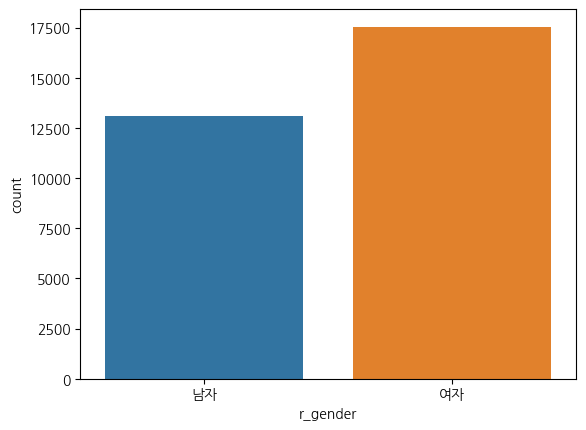

In [ ]:
# user_df
sns.countplot(data=user_df, x = 'r_gender')

<Axes: xlabel='age', ylabel='count'>

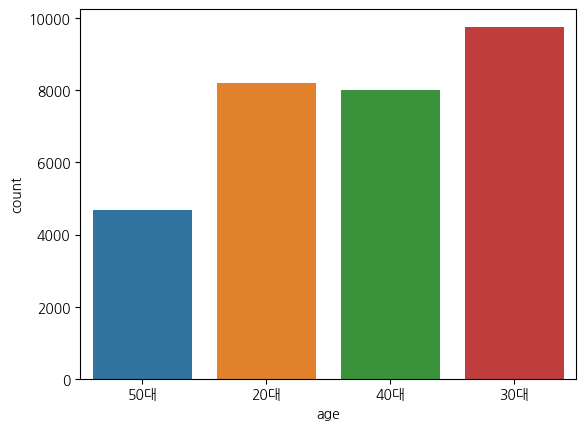

In [ ]:
sns.countplot(data=user_df, x = 'age')

<Axes: xlabel='mar', ylabel='count'>

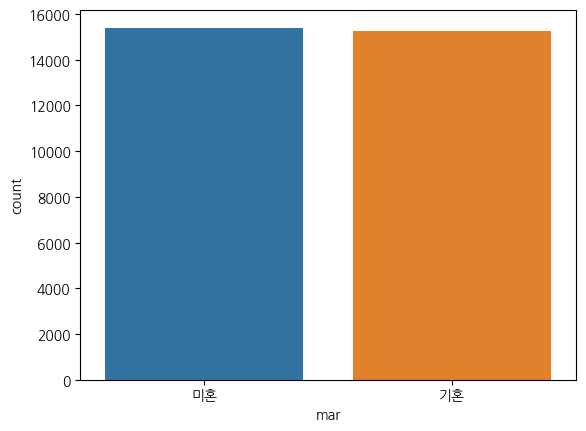

In [ ]:
sns.countplot(data=user_df, x = 'mar')

<Axes: xlabel='job', ylabel='count'>

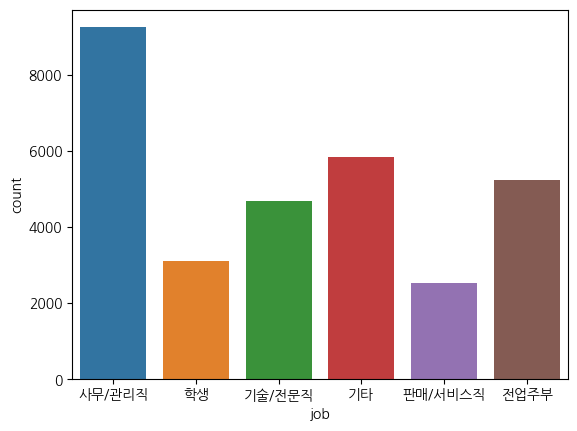

In [ ]:
sns.countplot(data=user_df, x = 'job')

<Axes: xlabel='income', ylabel='count'>

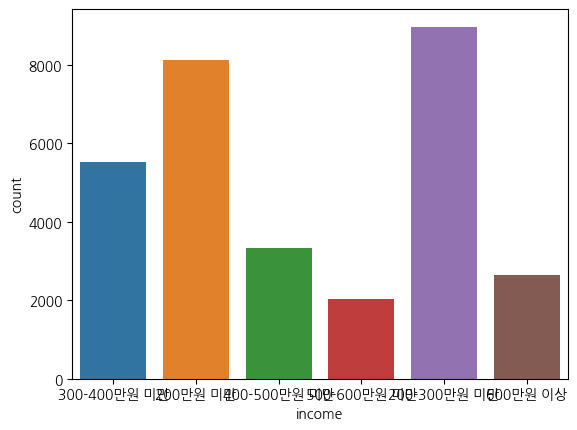

In [ ]:
sns.countplot(data=user_df, x = 'income')

## 2-2) survey_df